In [72]:
from requests_html import HTMLSession

session = HTMLSession()

# Then we use session.get to get the contents of the url
response = session.get('https://www.etsy.com/people/sslrulz66?ref=hdr-fav&tab=items&available_only=true&page=8')

#https://www.etsy.com/people/sslrulz66?ref=hdr-fav&tab=items&available_only=true&page=2 through 8 

In [74]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

#print(soup.prettify())

<!DOCTYPE html>
<html class="ui-toolkit" lang="en-US" xml:lang="en-US" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="https://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible">
   <meta content="width=1024" name="viewport"/>
   <meta content="Is code your craft? https://www.etsy.com/careers" name="X-Recruiting"/>
   <meta content="3:1587062057:elQkblpR7zOdR88dXuhiDKHKMOfu:3bf8bf7e6c53705bc948881a19b55b9ad5abec9d3f5362ab3007a913e23cfb55" name="csrf_nonce"/>
   <meta content="3:1587062057:YfKxpdy3zILQN2Y8LRs7WU1OD9hV:820f27db9b2407e037e10d82ceded61a3e439739f1c9e5fc8062aad30fa40a9b" name="uaid_nonce"/>
   <meta content="89186614300" property="fb:app_id"/>
   <meta content="Etsy" property="og:site_name"/>
   <meta content="en_US" property="og:locale"/>
   <script charset="utf-8" type="text/javascript">
    !function(n,e){var t,o,i,c=[],f={passive:!0,

In [75]:
links = []

for link in soup.find_all("img", attrs={"class": "width-full"}):
    print(link.get('src'))
    links.append(link.get('src'))

https://i.etsystatic.com/5863001/d/il/4f58f5/729039381/il_340x270.729039381_6wqv.jpg?version=0
https://i.etsystatic.com/11374736/d/il/114f45/989716133/il_340x270.989716133_zvko.jpg?version=0


In [76]:
# links = []

# for link in link_tags:
#     links.append(link.attrs.get('src'))

In [77]:
print(links)

['https://i.etsystatic.com/5863001/d/il/4f58f5/729039381/il_340x270.729039381_6wqv.jpg?version=0', 'https://i.etsystatic.com/11374736/d/il/114f45/989716133/il_340x270.989716133_zvko.jpg?version=0']


In [78]:
import pandas as pd

df = pd.DataFrame(columns=['etsyimages'])
df

Empty DataFrame
Columns: [etsyimages]
Index: []

In [79]:
for link in links:
    images = links

    df = df.append({
    'etsyimages': images}, ignore_index=True)

   

In [80]:
df

etsyimages
0  [https://i.etsystatic.com/5863001/d/il/4f58f5/...
1  [https://i.etsystatic.com/5863001/d/il/4f58f5/...

In [81]:
import urllib.request

for index, row in df.iterrows():

    for url in row['etsyimages']:
        print(url)
        file_name = url.split('/')[-1]
        print(file_name)
        urllib.request.urlretrieve(url, 'scraped_images/' + file_name)

https://i.etsystatic.com/5863001/d/il/4f58f5/729039381/il_340x270.729039381_6wqv.jpg?version=0
il_340x270.729039381_6wqv.jpg?version=0
https://i.etsystatic.com/11374736/d/il/114f45/989716133/il_340x270.989716133_zvko.jpg?version=0
il_340x270.989716133_zvko.jpg?version=0
https://i.etsystatic.com/5863001/d/il/4f58f5/729039381/il_340x270.729039381_6wqv.jpg?version=0
il_340x270.729039381_6wqv.jpg?version=0
https://i.etsystatic.com/11374736/d/il/114f45/989716133/il_340x270.989716133_zvko.jpg?version=0
il_340x270.989716133_zvko.jpg?version=0


In [82]:
import tensorflow.keras as keras  
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.models import Model

In [84]:
model = keras.applications.VGG16(weights='imagenet', include_top =True) 
model.summary()
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
feat_extractor.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________

In [101]:
import glob 
import random 

image_files = glob.glob('./scraped_images/*.jpg') 

In [102]:
image_files

['./scraped_images/il_340x270.2095660752_o4pp.jpg',
 './scraped_images/il_340x270.2026276878_sf7e.jpg',
 './scraped_images/il_34.jpgx27.jpg.1893132654_6ear.jpg?version=.jpg',
 './scraped_images/il_34.jpgx27.jpg.381491854_eoaw.jpg?version=.jpg',
 './scraped_images/il_34.jpgx27.jpg.1838562658_2jov.jpg?version=.jpg',
 './scraped_images/il_34.jpgx27.jpg.1455222467_l.jpgl4.jpg?version=.jpg',
 './scraped_images/il_34.jpgx27.jpg.185651.jpg667_fxe3.jpg?version=.jpg',
 './scraped_images/il_34.jpgx27.jpg.1235236.jpg21_g3l1.jpg?version=.jpg',
 './scraped_images/il_34.jpgx27.jpg.1537588495_8b8x.jpg?version=.jpg',
 './scraped_images/il_340x270.2000463641_rymc.jpg',
 './scraped_images/il_340x270.1897797524_4pje.jpg',
 './scraped_images/il_340x270.1703645560_5mxm.jpg',
 './scraped_images/il_34.jpgx27.jpg.18357195.jpg7_48wt.jpg?version=.jpg',
 './scraped_images/il_34.jpgx27.jpg.159125.jpg.jpg76_c.jpgk8.jpg?version=.jpg',
 './scraped_images/il_34.jpgx27.jpg.1736929355_ftz3.jpg?version=.jpg',
 './scrape

In [103]:
len(image_files)

140

In [104]:
random.shuffle(image_files)

In [105]:
import numpy as np
features = []

# for i, image_path in zip(range(0,len(image_files)), image_files) # same as below 

for i, image_path in enumerate(image_files): #it takes image_files and goes through and gives you each item and its associated index 
    if i % 10 == 0:
        print("analyzed " + str(i) + " out of " + str(len(image_files)))
    
    img = image.load_img(image_path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img) # turning it into a numpy array 
    #print(x)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    #print(x)
    
    feat = feat_extractor.predict(x)[0] # grabbing first value out of that prediction 
    #print(len(feat))
    features.append(feat)

analyzed 0 out of 140
analyzed 10 out of 140
analyzed 20 out of 140
analyzed 30 out of 140
analyzed 40 out of 140
analyzed 50 out of 140
analyzed 60 out of 140
analyzed 70 out of 140
analyzed 80 out of 140
analyzed 90 out of 140
analyzed 100 out of 140
analyzed 110 out of 140
analyzed 120 out of 140
analyzed 130 out of 140


In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 

ss = StandardScaler()
scaled = ss.fit_transform(features)
scaled[0] 

array([ 0.87103938, -0.41150172,  1.77895865, ..., -0.40353281,
       -0.76022923,  0.01710634])

In [144]:
kmeans = KMeans(n_clusters=6)
clusters = kmeans.fit_predict(scaled)
clusters

array([5, 1, 5, 1, 5, 1, 1, 4, 5, 2, 1, 1, 1, 5, 4, 5, 5, 4, 5, 1, 5, 0,
       1, 1, 5, 1, 2, 4, 5, 1, 1, 5, 0, 4, 1, 1, 5, 1, 5, 4, 1, 1, 1, 2,
       1, 5, 4, 5, 1, 1, 1, 1, 1, 5, 3, 5, 2, 5, 4, 4, 1, 5, 4, 5, 5, 1,
       5, 1, 2, 5, 1, 1, 4, 5, 4, 5, 5, 5, 1, 5, 5, 0, 5, 5, 1, 1, 1, 4,
       4, 2, 0, 1, 4, 1, 1, 0, 4, 5, 1, 1, 1, 5, 0, 5, 5, 1, 5, 0, 5, 1,
       2, 4, 1, 0, 5, 0, 1, 1, 2, 2, 0, 5, 0, 5, 1, 1, 1, 5, 5, 5, 5, 1,
       1, 5, 5, 0, 1, 5, 5, 1], dtype=int32)

In [145]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5, metric='cosine').fit(scaled)
_, closest = neighbors.kneighbors(kmeans.cluster_centers_)

In [146]:
closest

array([[120,  90,  21, 102, 135],
       [ 29,  41, 124,   5,  10],
       [ 43,   9, 118,  68,  26],
       [ 54,  79, 131,   0,  51],
       [ 14,  72,  96,  88,  87],
       [ 28,  69,   2,  55,  57]])

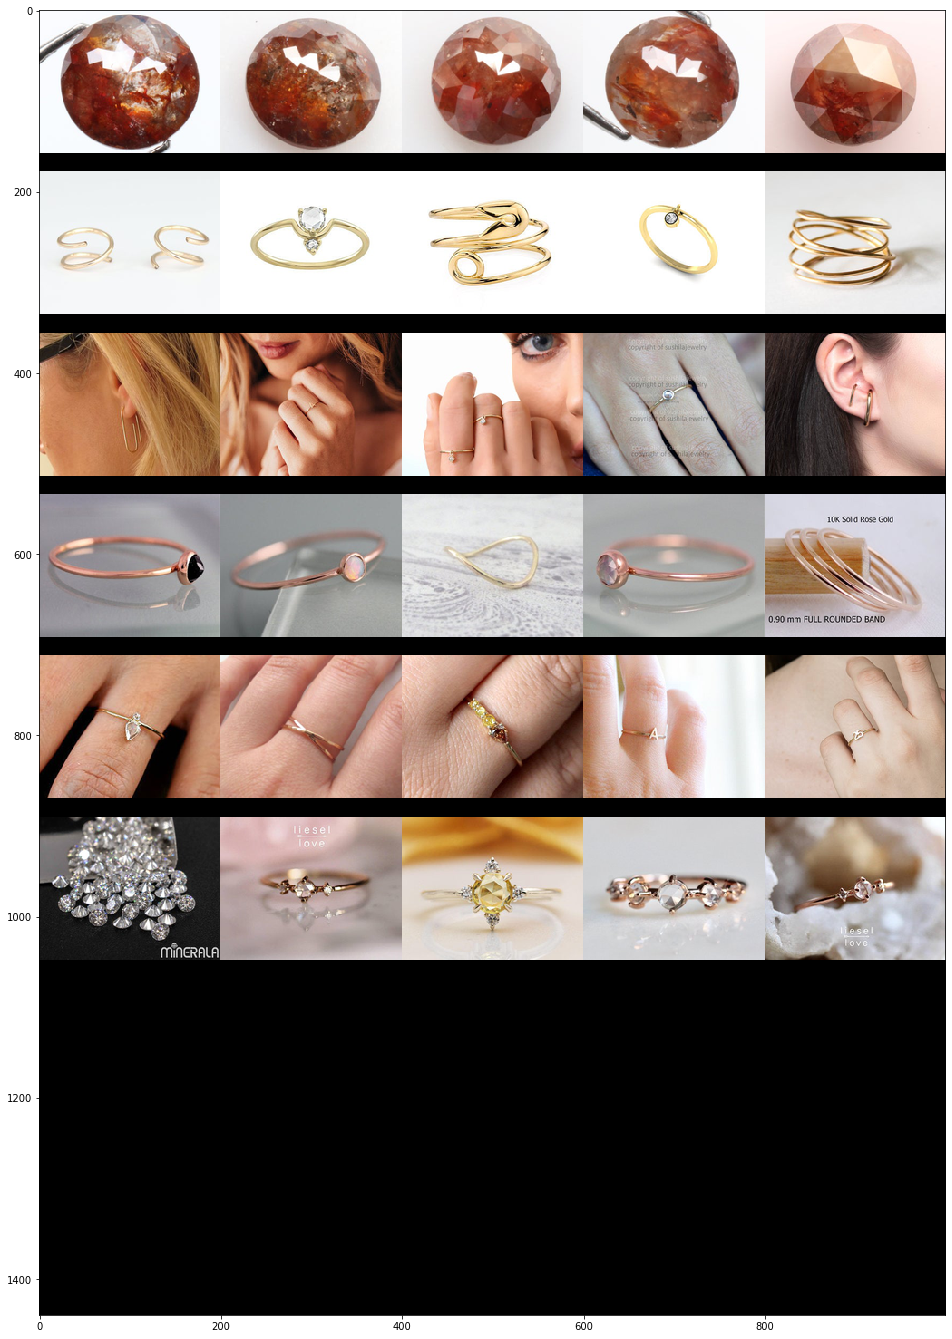

In [147]:
from PIL import Image
import matplotlib.pyplot as plt

img_width = 200

grid_image = Image.new('RGB', (5 * img_width, len(closest) * 240), (0, 0, 0, 255))

max_height = 0
for cluster_row in closest:
    max_height_temp = 0
    xpos = 0
    for col_num in cluster_row:
        img = Image.open(image_files[col_num])
        img_ar = img.width / img.height
        img = img.resize((img_width, int(img_width / img_ar)), Image.ANTIALIAS)
        max_height_temp = max(max_height_temp, img.height)
        grid_image.paste(img, (xpos, max_height))
        xpos = xpos + img.width
    max_height = max_height + max_height_temp + 20 # adding 20 pixel margin

plt.figure(figsize = (32,24))
plt.imshow(grid_image)

In [148]:
import umap.umap_ as umap
embedding = umap.UMAP().fit_transform(scaled)

In [149]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(embedding)
embedding_scaled = scaler.transform(embedding)

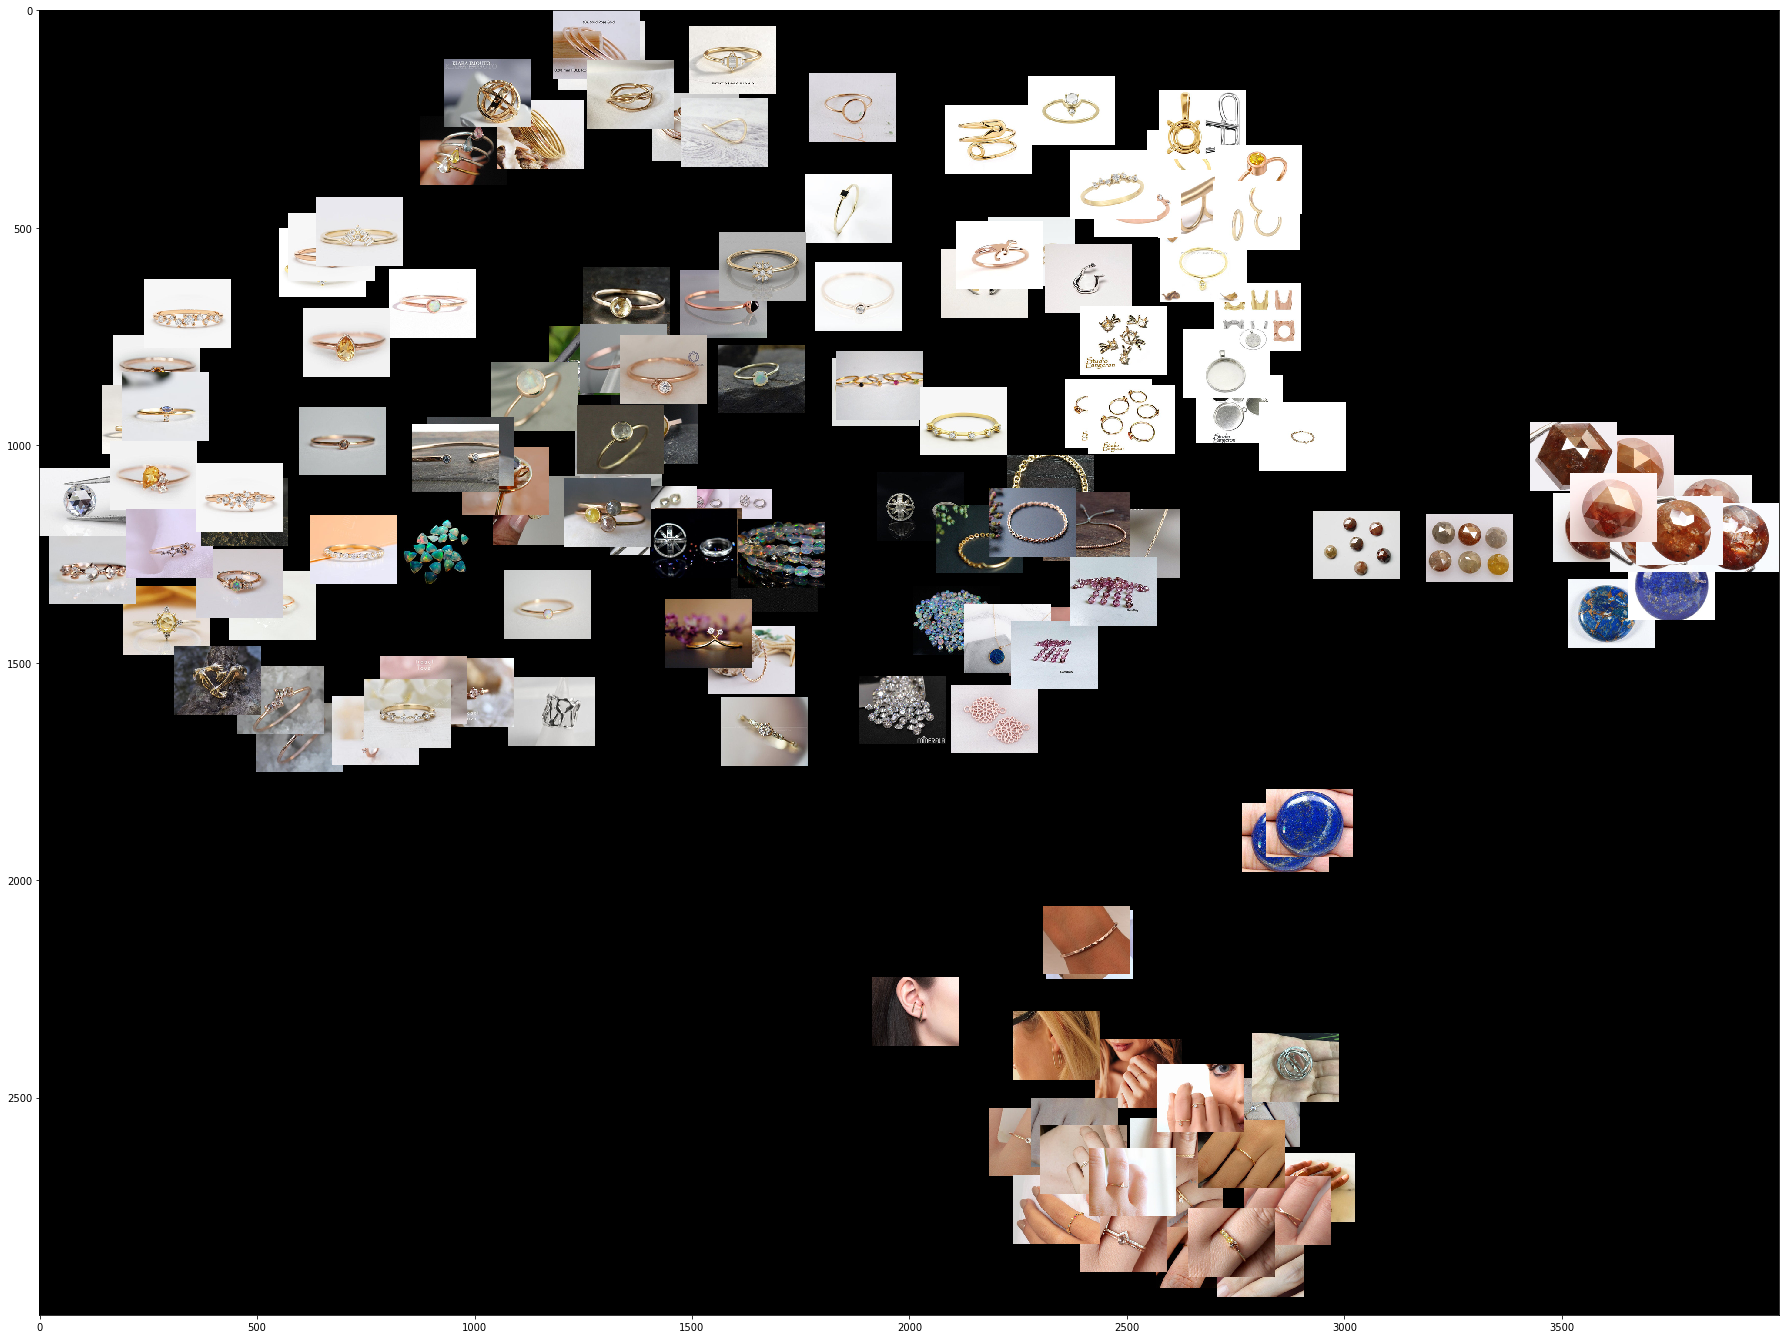

In [150]:
width = 4000
height = 3000
max_dim = 200

full_image = Image.new('RGBA', (width, height), (0, 0, 0, 255))
for img, pos in zip(image_files, embedding_scaled):
    x = pos[0]
    y = pos[1]
    tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

plt.figure(figsize = (32,24))
plt.imshow(full_image)